In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import math

In [ ]:
pd.set_option("display.float_format", lambda x : "{:.2f}".format(x))
np.set_printoptions(suppress=True)

In [2]:
df_customers = pd.read_csv("../resources/customers.csv")
df_loans = pd.read_csv("../resources/loans.csv")
df_bureau = pd.read_csv("../resources/bureau_data.csv")

In [3]:
df=pd.merge(df_customers,df_loans,on="cust_id")

In [4]:
df=pd.merge(df,df_bureau)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [5]:
df["default"]=df["default"].astype(int)

In [6]:
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [7]:
X=df.drop("default",axis="columns")
y=df['default']
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [8]:
df_train=pd.concat([X_train,y_train],axis="columns")
df_test=pd.concat([X_test,y_test],axis="columns")

In [9]:
df_train.shape

(37500, 33)

In [10]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [11]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [17]:
mode_residence=df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [ ]:
df_train.residence_type.fillna(mode_residence,inplace=True)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,C28516,70,M,Single,Self-Employed,2470000,0,Owned,20,Kolkata,...,2022-05-30,2022-06-09,2,0,40,0,0,5,13,0
5558,C05559,39,F,Single,Salaried,2472000,0,Rented,26,Kolkata,...,2020-02-12,2020-02-17,1,0,52,14,72,4,44,0
45236,C45237,39,M,Married,Self-Employed,1329000,4,Owned,10,Pune,...,2024-01-30,2024-02-04,4,2,130,11,44,6,97,1
49228,C49229,33,M,Single,Salaried,1274000,2,Owned,26,Chennai,...,2024-06-24,2024-07-21,2,1,88,0,0,6,25,0


In [19]:
df_test.residence_type.fillna(mode_residence,inplace=True)

/tmp/ipykernel_2327/838491418.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence,inplace=True)


In [21]:
df_train.duplicated().sum()

np.int64(0)

In [22]:
df_test.duplicated().sum()

np.int64(0)

In [23]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [55]:
columns_categorical=['gender','marital_status','employment_status','residence_type', 'city','state','zipcode','loan_purpose','loan_type'
                     , 'default']
columns_continuous = ['years_at_current_address',
 'net_disbursement',
 'principal_outstanding',
 'total_loan_months',
 'number_of_dependants',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'processing_fee',
 'bank_balance_at_application',
 'loan_amount',
 'delinquent_months',
 'enquiry_count',
 'age',
 'number_of_closed_accounts',
 'loan_tenure_months',
 'income',
 'sanction_amount',
 'total_dpd',
 'gst']

#### Box Plots

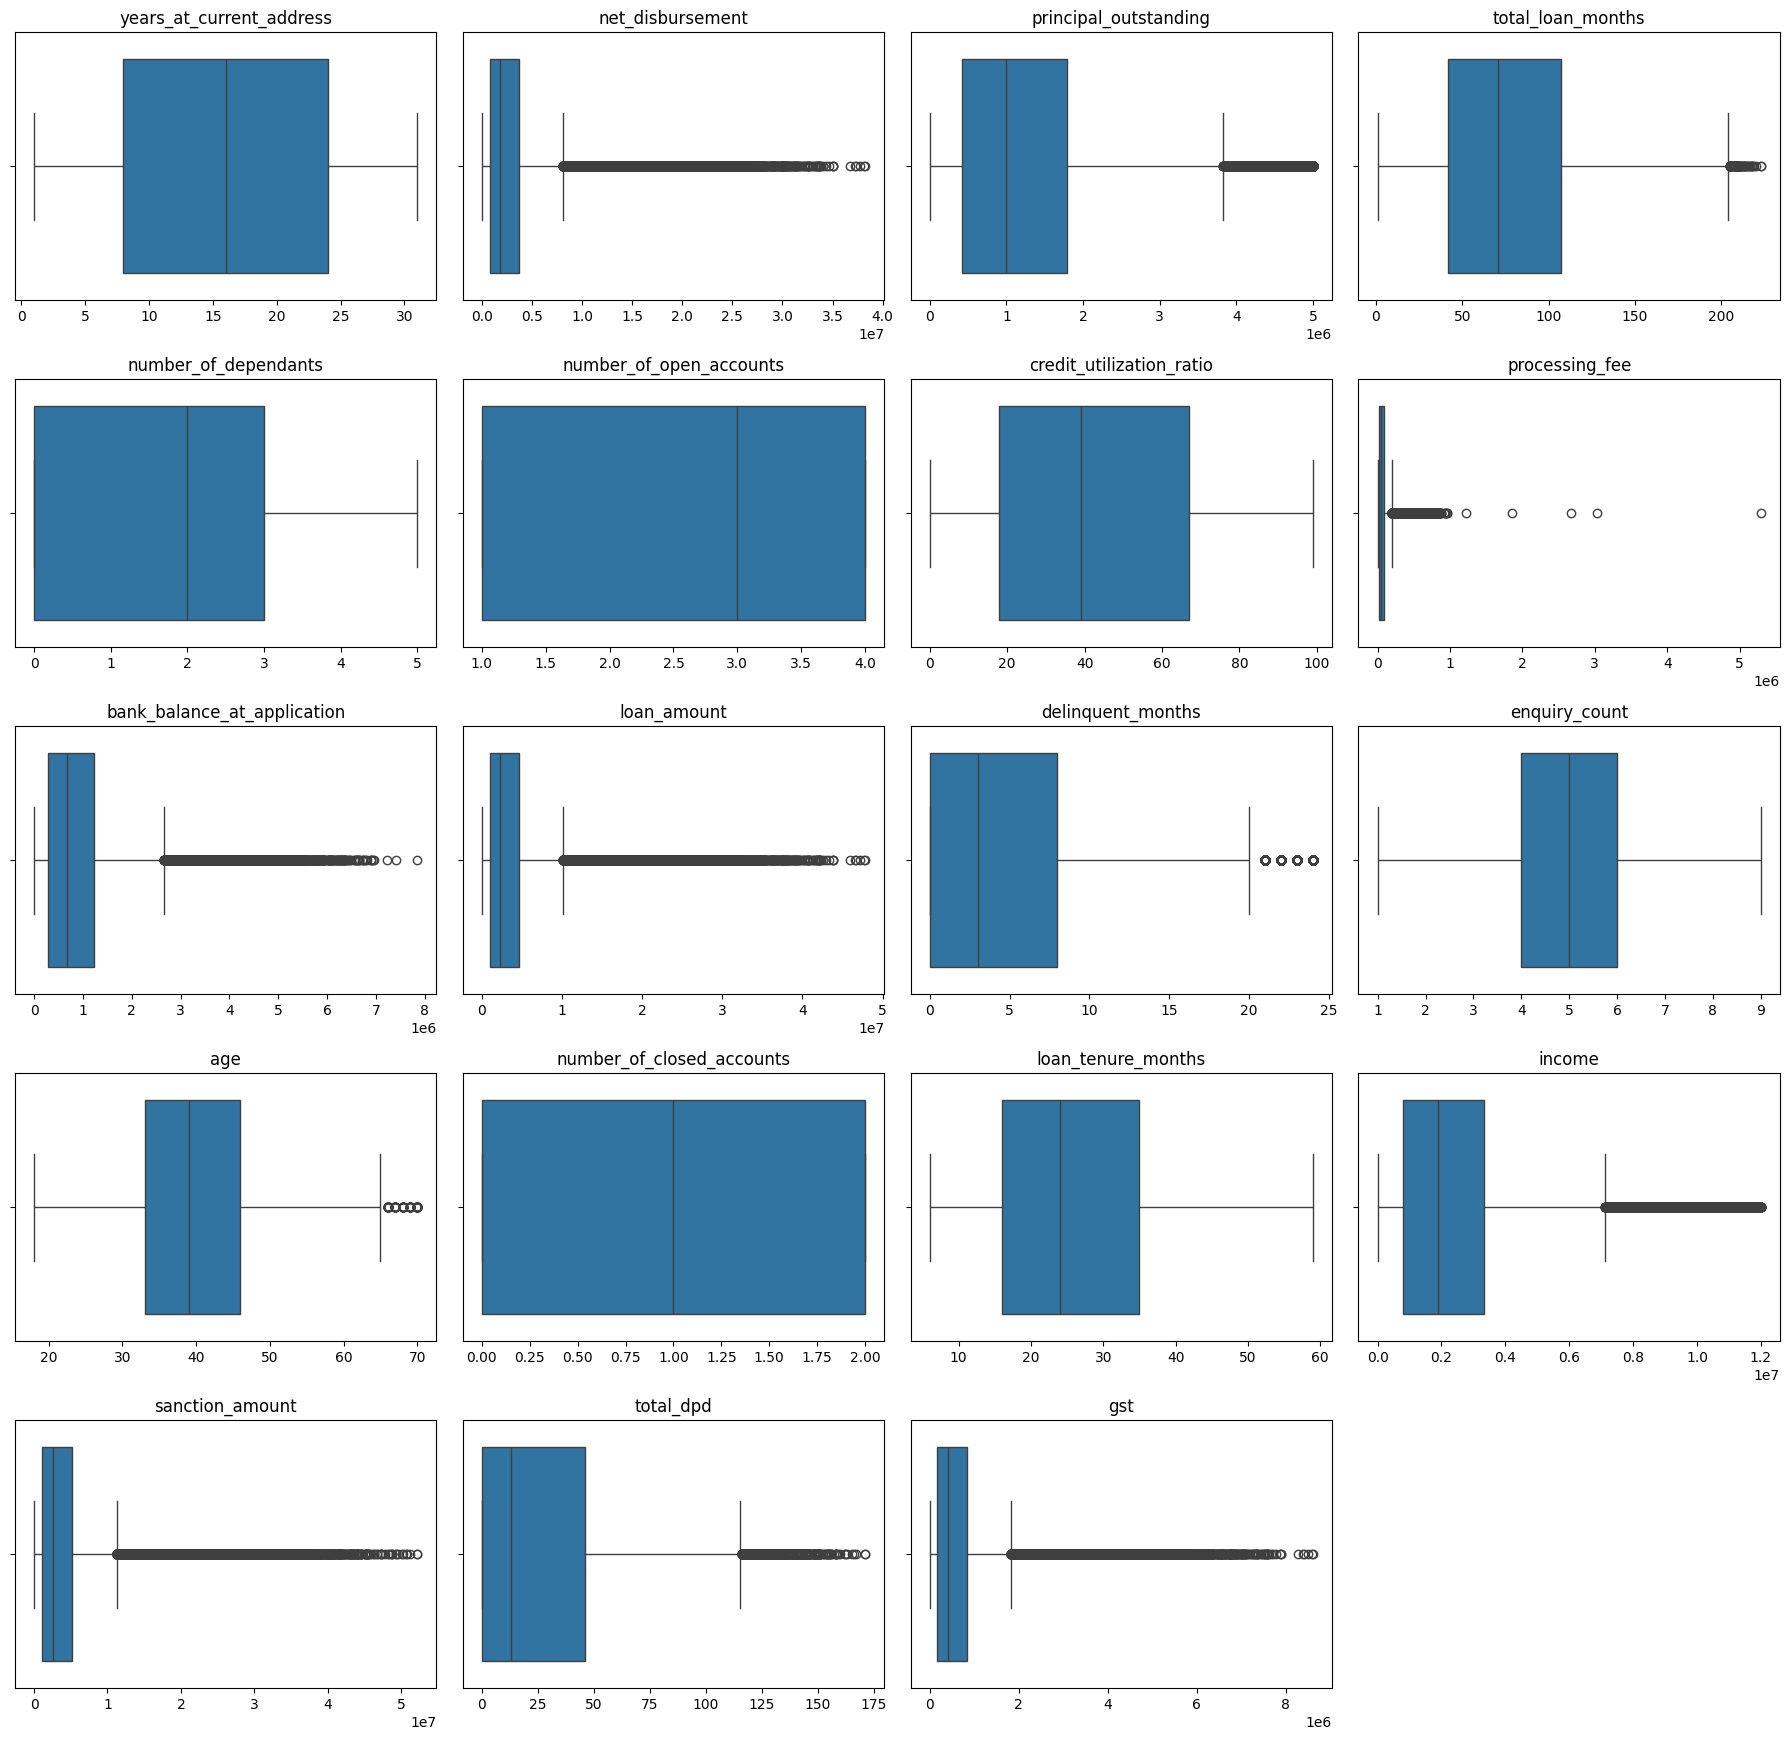

In [56]:
# Setting up the subplot grid with 4 columns per row
# ---
n_cols = 4  # You explicitly want 4 columns per row
n_plots = len(columns_continuous)
n_rows = (n_plots+n_cols-1) // n_cols # Calculate the number of rows needed

# Create the figure and a grid of subplots
# Adjust figsize for better readability based on the number of plots.
# n_cols * 4 or 5 is a good starting point for width, n_rows * 3 or 4 for height.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4.5, n_rows * 3.5))

# Flatten the axes array for easy iteration, regardless of n_rows or n_cols being 1
axes = axes.flatten()

# Loop through each continuous column and create a box plot
for i, column in enumerate(columns_continuous):
    sns.boxplot(x=df_train[column], ax=axes[i])
    axes[i].set_title(f'{column}') # Set title for each subplot
    axes[i].set_xlabel('') # Remove x-label if it clutters the plot

# ---
# Remove any unused subplots if the total number of plots doesn't perfectly fill the grid
# ---
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) # Delete the unused subplot

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

#### Histo Plots

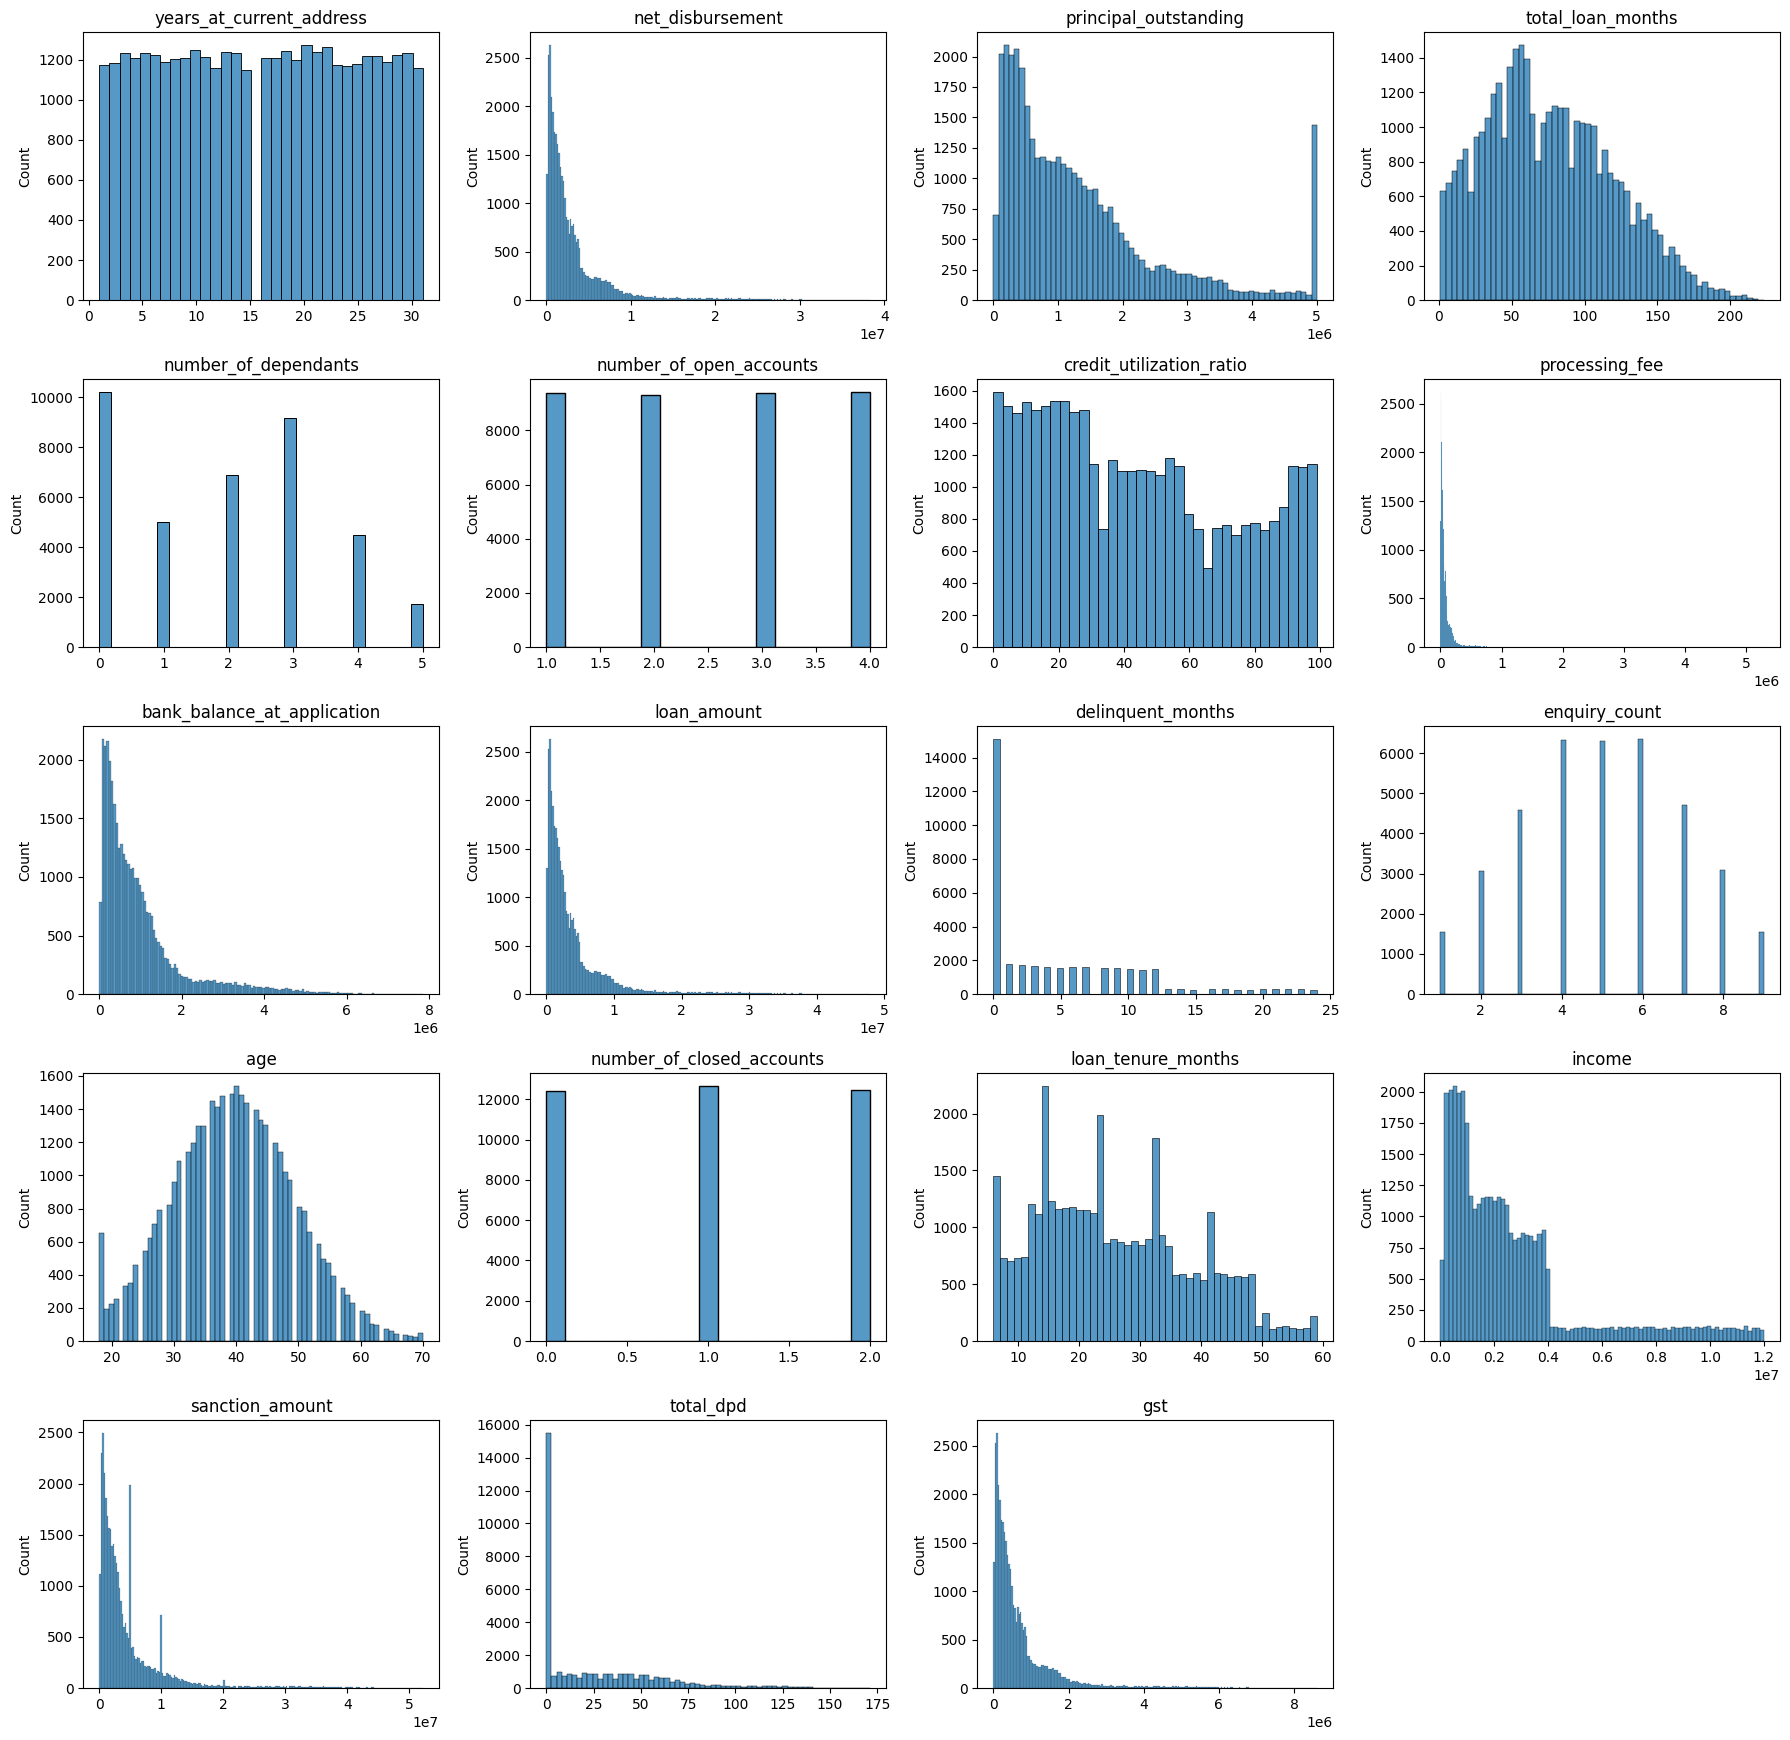

In [57]:
# Setting up the subplot grid with 4 columns per row
# ---
n_cols = 4  # You explicitly want 4 columns per row
n_plots = len(columns_continuous)
n_rows = (n_plots+n_cols-1) // n_cols # Calculate the number of rows needed

# Create the figure and a grid of subplots
# Adjust figsize for better readability based on the number of plots.
# n_cols * 4 or 5 is a good starting point for width, n_rows * 3 or 4 for height.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4.5, n_rows * 3.5))

# Flatten the axes array for easy iteration, regardless of n_rows or n_cols being 1
axes = axes.flatten()

# Loop through each continuous column and create a box plot
for i, column in enumerate(columns_continuous):
    sns.histplot(x=df_train[column], ax=axes[i])
    axes[i].set_title(f'{column}') # Set title for each subplot
    axes[i].set_xlabel('') # Remove x-label if it clutters the plot

# ---
# Remove any unused subplots if the total number of plots doesn't perfectly fill the grid
# ---
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) # Delete the unused subplot

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

In [58]:
df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

#### Handling Processing Fee Greater Then 3% Of Loan Amount

In [64]:
df_train=df_train[(df_train['processing_fee']/df_train["loan_amount"])< 0.03].copy()

In [65]:
df_test=df_test[(df_test['processing_fee']/df_test["loan_amount"])< 0.03].copy()

#### Looking For Categorical Columns Values

In [66]:
for col in columns_categorical:
    print(col,"-->",df_train[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [67]:
df_train['loan_purpose']=df_train['loan_purpose'].replace("Personaal","Personal")
df_test['loan_purpose']=df_test['loan_purpose'].replace("Personaal","Personal")

In [71]:
df_train[(df_train.gst/df_train.loan_amount)>0.2]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


<h3 align="center" style="color:blue">Exploratory Data Analysis</h3>

In [72]:
columns_continuous

['years_at_current_address',
 'net_disbursement',
 'principal_outstanding',
 'total_loan_months',
 'number_of_dependants',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'processing_fee',
 'bank_balance_at_application',
 'loan_amount',
 'delinquent_months',
 'enquiry_count',
 'age',
 'number_of_closed_accounts',
 'loan_tenure_months',
 'income',
 'sanction_amount',
 'total_dpd',
 'gst']

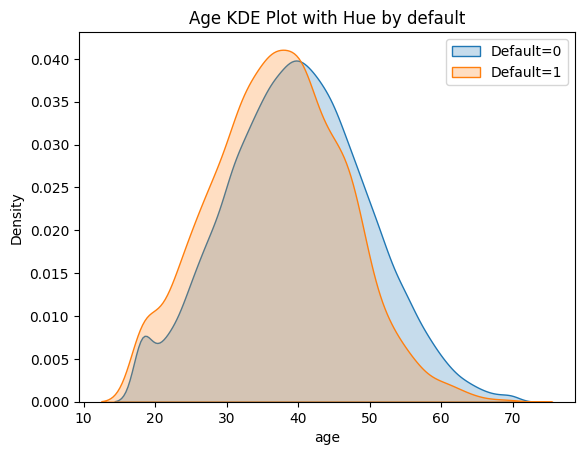

In [77]:
sns.kdeplot(df_train[df_train['default']==0]['age'],fill=True,label="Default=0")
sns.kdeplot(df_train[df_train['default']==1]['age'],fill=True,label="Default=1")
plt.title("Age KDE Plot with Hue by default")
plt.legend()
plt.show()

Insights 
1. Orange graph is litle bit shifted to the left of blue graph indicates that people with young age are more likely to default

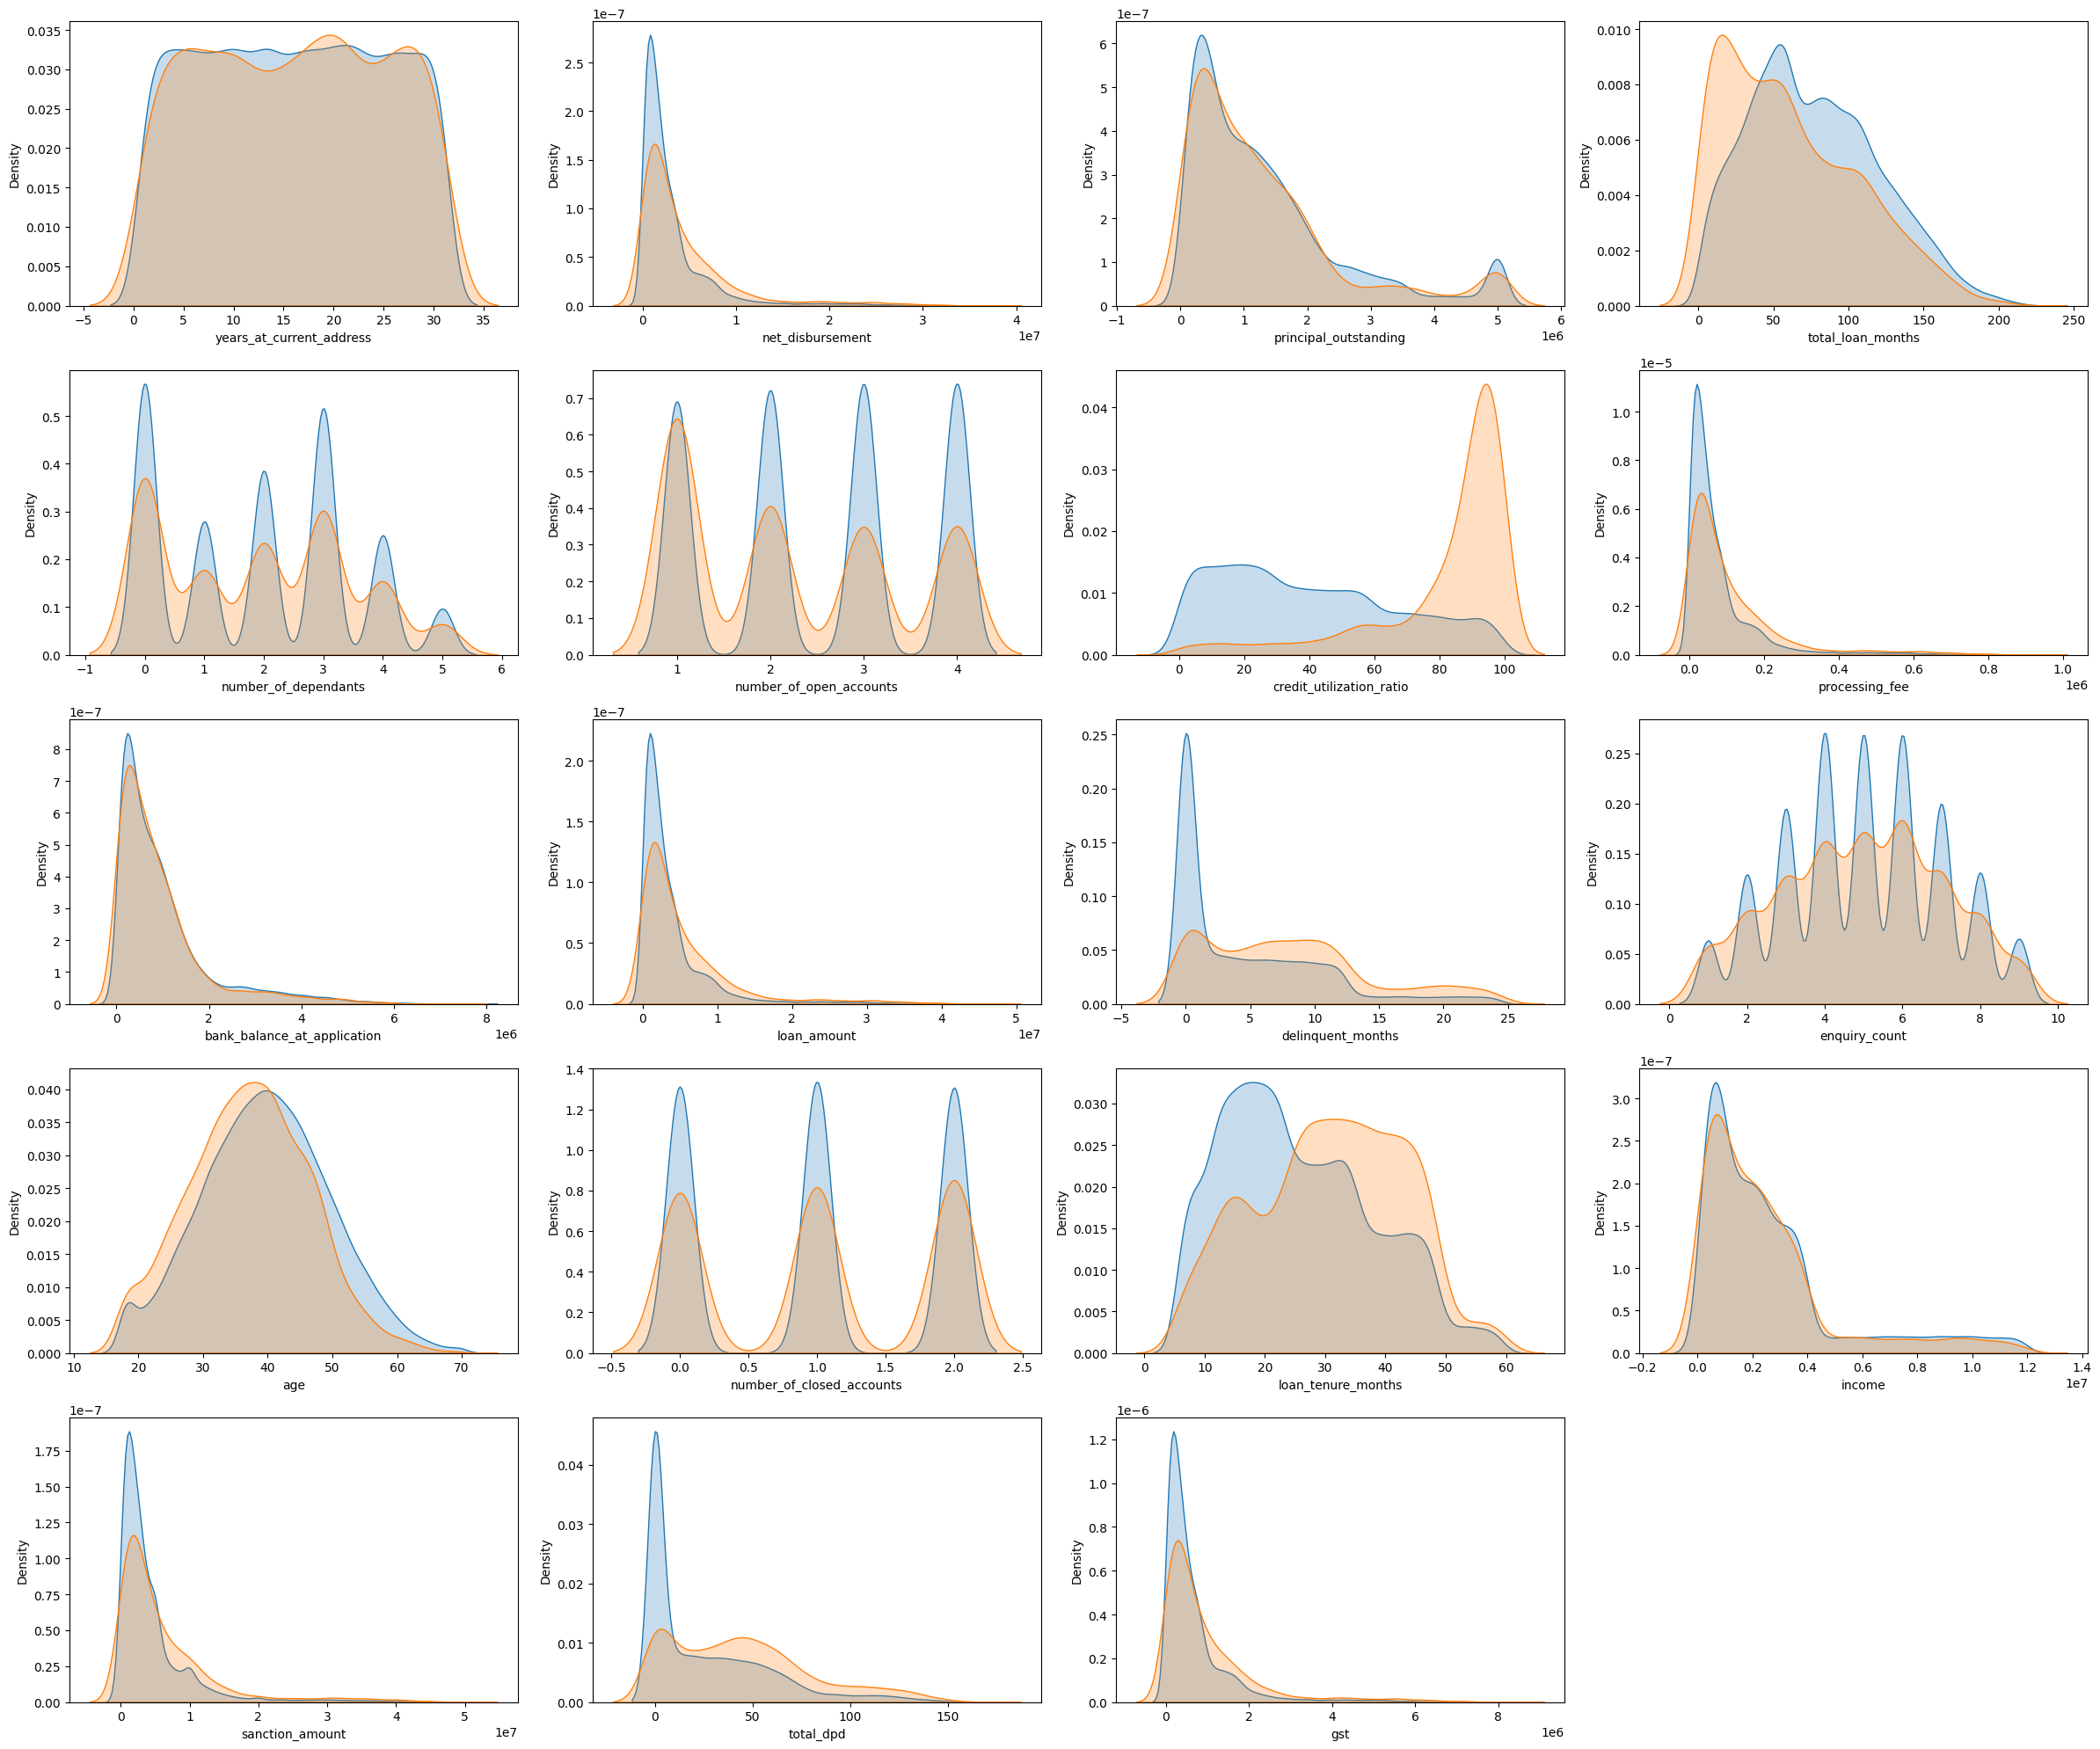

In [82]:
plt.figure(figsize=(24,20))

# Loop through each continuous column and create a box plot
for i, column in enumerate(columns_continuous):
    plt.subplot(5,4,i+1)
    sns.kdeplot(df_train[df_train['default']==0][column],fill=True,label="Default=0")
    sns.kdeplot(df_train[df_train['default']==1][column],fill=True,label="Default=1")

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

1. Hight predictor might be : credit_utilition_ratio, loan_tenure_months,total_dpd and deliquent months